In [1]:
# importing necessary dependancies
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import import_ipynb
from models import LSTMNet, CustomNet
from helpers import train_and_validate, count_parameters, plot_loss_comparison, plot_test_predictions, compare_mse_loss
import time

importing Jupyter notebook from models.ipynb
importing Jupyter notebook from helpers.ipynb


In [2]:
# use NVIDIA Geforce GTX 1650
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# hyperparameters
batch_size = 500
input_size = 2
hidden_size = 100
num_classes = 1
learning_rate = 0.001
momentum = 0.8
use_nesterov = True
max_norm = 1.0
epochs = 1000

In [4]:
# function to create the adding problem dataset
def adding_problem_generator(N, seq_len=8, high=1):
    """ A data generator for adding problem.

    A single entry has a 2D vector with two rows of the same length. 
    The first row has random numbers, and the second row contains a 
    binary mask with ones at only two positions. The label for this 
    entry is the sum of the numbers from the first row where the mask 
    is one.

     input          label
     -----          -----
    1 4 5 3  ----->   9 (4 + 5)
    0 1 1 0

    N: the number of the entries.
    eq_len: the length of a single sequence.
    p: the probability of 1 in generated mask
    high: the random data is sampled from a [0, high] uniform distribution.
    return: (X, Y), X the data, Y the label.
    """
    X_num = np.random.uniform(low=0, high=high, size=(N, seq_len, 1))
    X_mask = np.zeros((N, seq_len, 1))
    Y = np.ones((N, 1))
    for i in range(N):
        # Default uniform distribution on position sampling
        positions = np.random.choice(seq_len, size=2, replace=False)
        X_mask[i, positions] = 1
        Y[i, 0] = np.sum(X_num[i, positions])
    X = np.append(X_num, X_mask, axis=2)
    return X, Y

In [24]:
# creating the train and test datasets
X_train, Y_train = adding_problem_generator(10000, 50, 1)
X_val, Y_val = adding_problem_generator(1000, 50, 1)
X_test, Y_test = adding_problem_generator(100, 50, 1)
X_train = torch.tensor(X_train).float()
Y_train = torch.tensor(Y_train).float()
X_val = torch.tensor(X_val).float()
Y_val = torch.tensor(Y_val).float()
X_test = torch.tensor(X_test).float()
Y_test = torch.tensor(Y_test).float()

In [6]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

torch.Size([10000, 50, 2]) torch.Size([10000, 1])
torch.Size([1000, 50, 2]) torch.Size([1000, 1])
torch.Size([1000, 50, 2]) torch.Size([1000, 1])


In [7]:
class AddingProblemDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def __len__(self):
        return len(self.X)
        
    def __getitem__(self, i):
        return self.X[i], self.Y[i]

train_dataset = AddingProblemDataset(X_train, Y_train)
val_dataset = AddingProblemDataset(X_val, Y_val)

In [8]:
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False)

In [9]:
lstmnet = LSTMNet(input_size, hidden_size, num_classes).to(device)
customnet= CustomNet(input_size, hidden_size, num_classes).to(device)

In [10]:
total_lstmnet_parameters = count_parameters(lstmnet)
total_customnet_parameters = count_parameters(customnet)

In [11]:
criterion = nn.MSELoss()
lstmnet_optimizer = torch.optim.Adam(lstmnet.parameters(), lr = learning_rate)
customnet_optimizer = torch.optim.Adam(customnet.parameters(), lr = learning_rate)

In [12]:
lstmnet_train_loss_array = []
lstmnet_val_loss_array = []
customnet_train_loss_array = []
customnet_val_loss_array = []

In [13]:
lstmnet_start_time = time.time()
train_and_validate(epochs, device, lstmnet, train_loader, val_loader, criterion, lstmnet_optimizer, lstmnet_train_loss_array, lstmnet_val_loss_array)
lstmnet_end_time = time.time()
lstmnet_total_training_time = lstmnet_end_time - lstmnet_start_time
lstmnet_avg_training_time_per_epoch = lstmnet_total_training_time / epochs

Epoch no.: 1 | Training Loss: 0.7194843156635762 | Validation Loss: 0.2683191210031509
Epoch no.: 2 | Training Loss: 0.2114259697496891 | Validation Loss: 0.19384582638740538
Epoch no.: 3 | Training Loss: 0.18581285521388055 | Validation Loss: 0.1768350198864937
Epoch no.: 4 | Training Loss: 0.17273862957954406 | Validation Loss: 0.16703065633773803
Epoch no.: 5 | Training Loss: 0.16665670692920684 | Validation Loss: 0.16349803954362868
Epoch no.: 6 | Training Loss: 0.16504080101847649 | Validation Loss: 0.16277559101581573
Epoch no.: 7 | Training Loss: 0.16470575138926505 | Validation Loss: 0.16219962984323502
Epoch no.: 8 | Training Loss: 0.1645230283588171 | Validation Loss: 0.1622178316116333
Epoch no.: 9 | Training Loss: 0.16442911125719548 | Validation Loss: 0.16236878782510758
Epoch no.: 10 | Training Loss: 0.16426171131432057 | Validation Loss: 0.16169329285621642
Epoch no.: 11 | Training Loss: 0.16411199413239955 | Validation Loss: 0.1615442991256714
Epoch no.: 12 | Training L

KeyboardInterrupt: 

In [15]:
customnet_start_time = time.time()
train_and_validate(epochs, device, customnet, train_loader, val_loader, criterion, customnet_optimizer, customnet_train_loss_array, customnet_val_loss_array)
customnet_end_time = time.time()
customnet_total_training_time = customnet_end_time - customnet_start_time
customnet_avg_training_time_per_epoch = customnet_total_training_time / epochs

Epoch no.: 1 | Training Loss: 0.5627740150690079 | Validation Loss: 0.37167383432388307
Epoch no.: 2 | Training Loss: 0.3520489713549614 | Validation Loss: 0.3339597135782242
Epoch no.: 3 | Training Loss: 0.30710160702466965 | Validation Loss: 0.28144916146993637
Epoch no.: 4 | Training Loss: 0.25206740215420725 | Validation Loss: 0.2317903757095337
Epoch no.: 5 | Training Loss: 0.2144658175110817 | Validation Loss: 0.20722615718841553
Epoch no.: 6 | Training Loss: 0.19889853671193122 | Validation Loss: 0.19757317751646042
Epoch no.: 7 | Training Loss: 0.19207039281725882 | Validation Loss: 0.19121020585298537
Epoch no.: 8 | Training Loss: 0.18699405267834662 | Validation Loss: 0.18624591529369355
Epoch no.: 9 | Training Loss: 0.18267814040184022 | Validation Loss: 0.18144818097352983
Epoch no.: 10 | Training Loss: 0.17905968621373178 | Validation Loss: 0.1778977170586586
Epoch no.: 11 | Training Loss: 0.1764358824491501 | Validation Loss: 0.17525013387203217
Epoch no.: 12 | Training L

KeyboardInterrupt: 

In [25]:
lstmnet_predictions = lstmnet(X_test.to(device)).cpu().detach().numpy()
customnet_predictions = customnet(X_test.to(device)).cpu().detach().numpy()

In [26]:
# FINAL REPORT PRINT
print()
print()
print("------------------------------------------------------------")
print(f"Total Parameters:     LSTMNet: {total_lstmnet_parameters}  |  CustomNet: {total_customnet_parameters}")
print()
print(f"Total Training Time:     LSTMNet: {lstmnet_total_training_time}s  |  CustomNet: {customnet_total_training_time}s")
print()
print(f"Average Training Time Per Epoch:     LSTMNet: {lstmnet_avg_training_time_per_epoch}s  |  CustomNet: {customnet_avg_training_time_per_epoch}s")

print("------------------------------------------------------------")



------------------------------------------------------------
Total Parameters:     LSTMNet: 41301  |  CustomNet: 20401



NameError: name 'lstmnet_total_training_time' is not defined

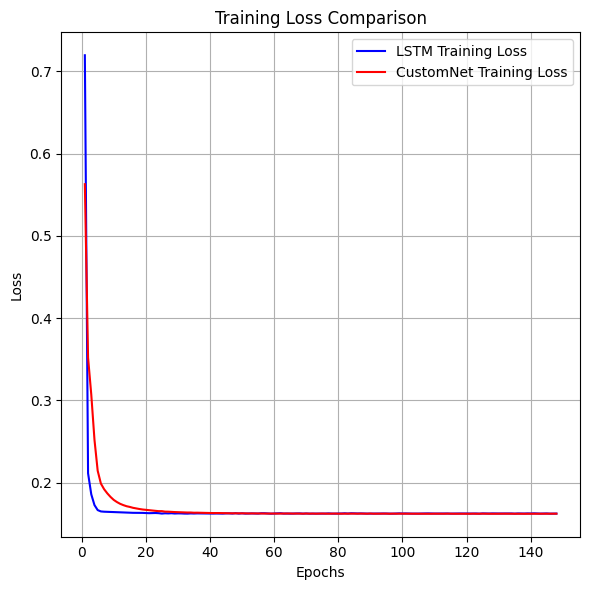

In [27]:
plot_loss_comparison(epochs, lstmnet_train_loss_array, customnet_train_loss_array, "LSTM Training Loss", "CustomNet Training Loss", "Training Loss Comparison")

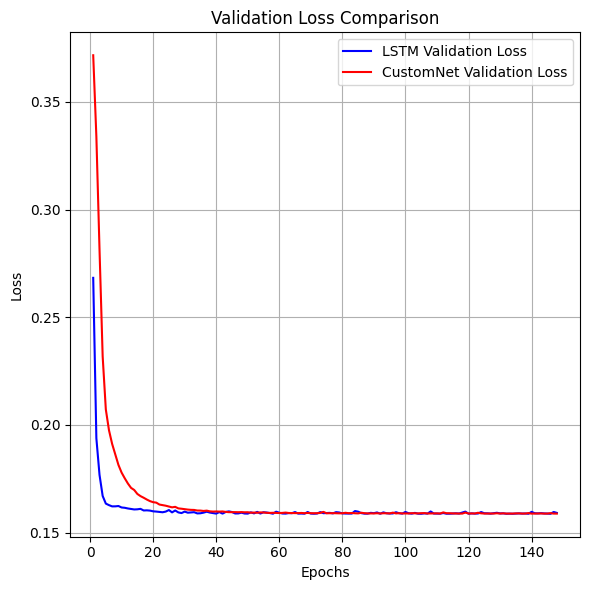

In [28]:
plot_loss_comparison(epochs, lstmnet_val_loss_array, customnet_val_loss_array, "LSTM Validation Loss", "CustomNet Validation Loss", "Validation Loss Comparison")

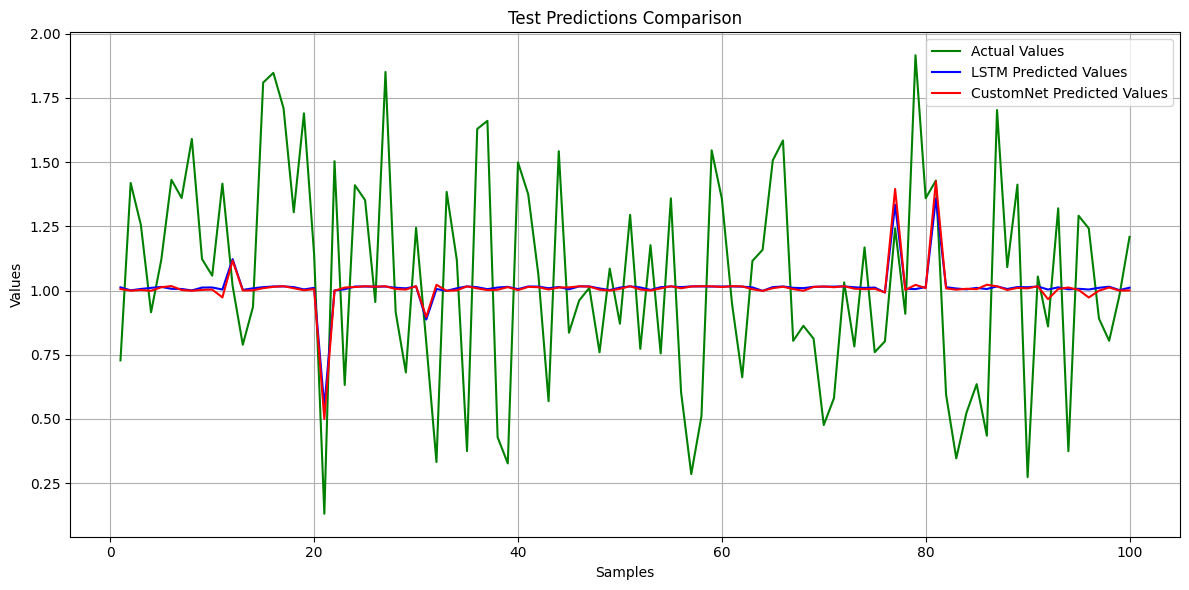

In [29]:
plot_test_predictions(Y_test, lstmnet_predictions, customnet_predictions)

In [30]:
compare_mse_loss(Y_test, lstmnet_predictions, customnet_predictions)

LSTM MSE Loss: 0.16355425119400024
Custom Network MSE Loss: 0.1637735515832901
